In [1]:
import numpy as np
import pandas as pd
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [2]:
all_events=pd.read_csv('raw_data/500_users_events.csv')
action_types=['browsed','collected','carted','bought']

In [3]:
total_users=len(all_events.user_id.unique())
total_items=len(all_events.item_id.unique())
'total events %d, total users %d, total items %d' % (len(all_events),total_users, total_items)

'total events 571688, total users 500, total items 198786'

In [4]:
behaves=all_events[['user_id','item_id','behavior_type','time']].pivot_table(index=['user_id','item_id'],columns='behavior_type',aggfunc='count').fillna(0)
behaves.columns=action_types

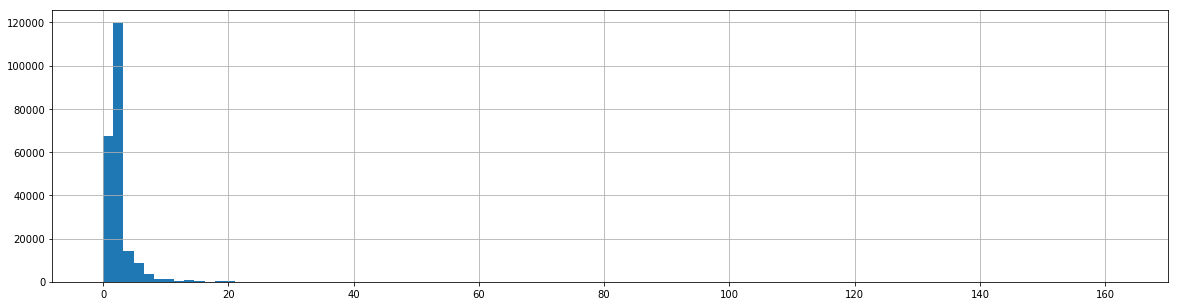

In [5]:
behaves.browsed.hist(bins=100,figsize=(20,5))

In [6]:
'average user events %d' % (len(all_events)//total_users)

'average user events 1143'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A8B8BE0>]], dtype=object)

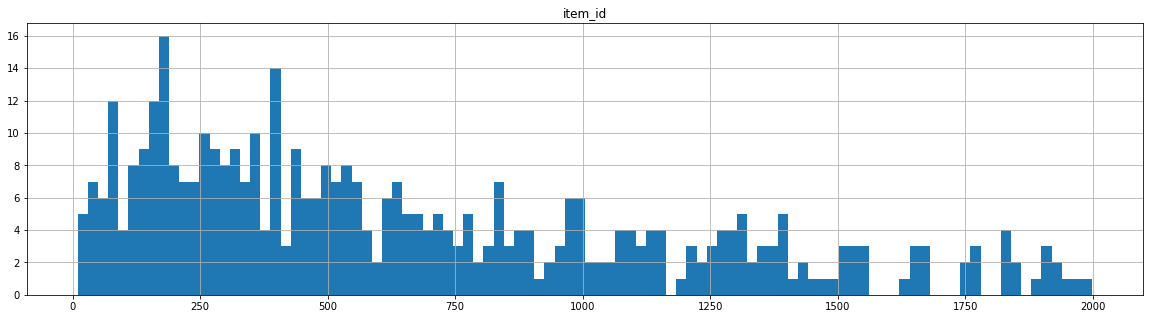

In [7]:
all_events.groupby('user_id').count()[['item_id']][lambda df:df.item_id<2000].hist(bins=100,figsize=(20,5))

In [8]:
behaves.corr()

,browsed,collected,carted,bought
browsed,1.000000,0.242690,0.398891,0.375305
collected,0.242690,1.000000,0.033898,0.054863
carted,0.398891,0.033898,1.000000,0.356248
bought,0.375305,0.054863,0.356248,1.000000


In [9]:
behaves['label']=behaves.bought.apply(lambda b:1. if b>0 else 0.)

buy_behaves=behaves[behaves.label==1]
nbuy_behaves=behaves[behaves.label==0]

sample_nbuy_idx=np.random.choice(len(nbuy_behaves),len(buy_behaves))
sample_behaves=pd.concat([buy_behaves,nbuy_behaves.iloc[sample_nbuy_idx]])
assert(len(sample_behaves[sample_behaves.label==0])==len(sample_behaves[sample_behaves.label==1]))

X_train,X_test,y_train,y_test=train_test_split(sample_behaves[['browsed']],sample_behaves[['label']],test_size=.2)

lr=LogisticRegression()
lr.fit(X_train,y_train)
roc_auc_score(y_train,lr.predict_proba(X_train)[:,1])

C:\apps\Anaconda2\envs\py3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.85441260757864879

In [20]:
from sklearn.preprocessing import RobustScaler
help(RobustScaler)

Help on class RobustScaler in module sklearn.preprocessing.data:

class RobustScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Scale features using statistics that are robust to outliers.
 |  
 |  This Scaler removes the median and scales the data according to
 |  the quantile range (defaults to IQR: Interquartile Range).
 |  The IQR is the range between the 1st quartile (25th quantile)
 |  and the 3rd quartile (75th quantile).
 |  
 |  Centering and scaling happen independently on each feature (or each
 |  sample, depending on the ``axis`` argument) by computing the relevant
 |  statistics on the samples in the training set. Median and  interquartile
 |  range are then stored to be used on later data using the ``transform``
 |  method.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators. Typically this is done by removing the mean
 |  and scaling to unit variance. However, outliers can often influence the
 |  samp

In [23]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

ss=MinMaxScaler()
behaves['browsed_std']=ss.fit_transform(behaves[['browsed']])
behaves['rating']=behaves['browsed_std']+behaves['bought']

behaves.describe()

,browsed,collected,carted,bought,label,browsed_std,rating
count,218625.000000,218625.000000,218625.000000,218625.000000,218625.000000,218625.000000,218625.000000
mean,2.464256,0.045901,0.077512,0.027257,0.023200,0.015211,0.042468
std,2.378155,0.220861,0.330016,0.204026,0.150537,0.014680,0.209977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.006173,0.006173
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.012346,0.012346
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.018519,0.018519
max,162.000000,5.000000,8.000000,14.000000,1.000000,1.000000,14.030864


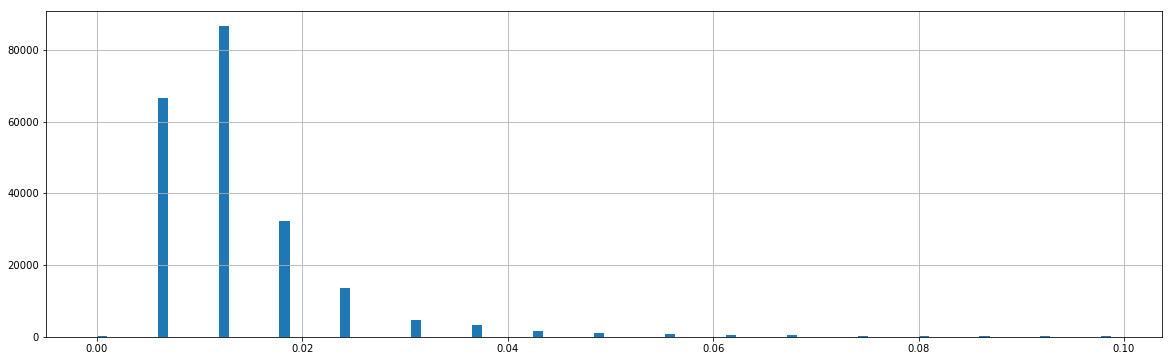

In [28]:
behaves[behaves.rating<0.1].rating.hist(bins=100,figsize=(20,6))